In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12487019850323292592,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8414214418223032980
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6934559456
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 257268366115195425
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9673905217543934122
 physical_device_desc: "device: XLA_GPU device"]

# Tensorflow 기초

> 파이썬으로 만드는 인공지능 - 오일석 이진선 저

## Tensorflow 개념 익히기

### Tensorflow와 Numpy 호환

In [2]:
import tensorflow as tf

print(tf.__version__)
a = tf.random.uniform([2,3], 0.1)
print(a)
print(type(a))

2.3.0
tf.Tensor(
[[0.7915165  0.22036734 0.26208353]
 [0.97245187 0.42108443 0.2803941 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [3]:
# numpy와 tensorflow 호환성
import numpy as np
t = tf.random.uniform([2,3], 0.1)
n = np.random.uniform(0, 1, [2,3])
print("tensorflow로 생성한 텐서: \n", t, "\n")
print("numpy로 생성한 ndarray: \n", n, "\n")

res = t + n
print('덧셈 결과:\n', res)

tensorflow로 생성한 텐서: 
 tf.Tensor(
[[0.1063858  0.66791075 0.45156044]
 [0.6638761  0.5543928  0.4195752 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray: 
 [[0.13886139 0.73730569 0.12819502]
 [0.01015847 0.28053356 0.22078133]] 

덧셈 결과:
 tf.Tensor(
[[0.24524719 1.4052165  0.5797554 ]
 [0.6740346  0.83492637 0.64035654]], shape=(2, 3), dtype=float32)


### Tensor 이해하기


In [4]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
yy_train = tf.one_hot(y_train, 10, dtype=tf.int8)
print("MNIST: ", x_train.shape, y_train.shape, yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
yy_train = tf.one_hot(y_train, 10, dtype=tf.int8)
print("CIFAR-10: ", x_train.shape, y_train.shape, yy_train.shape)

# Boston 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = ds.boston_housing.load_data()
print("Boston Housing: ", x_train.shape, y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = ds.reuters.load_data()
print("Reuters: ", x_train.shape, y_train.shape)

MNIST:  (60000, 28, 28) (60000,) (60000, 10)
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
Boston Housing:  (404, 13) (404,)
Reuters:  (8982,) (8982,)


C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\saeji\anaconda3\envs\tensorflow2.3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 텐서플로 프로그래밍 기초

### 퍼셉트론 직접 계산 - 복잡함

In [5]:
import tensorflow as tf

# OR 데이터 구축
x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
y = [[-1], [1], [1], [1]]

# [그림 4-3(b)]의 퍼셉트론
w = tf.Variable([[1.0], [1.0]])
b = tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동ㅇ작
s = tf.add(tf.matmul(x, w), b)
o = tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [6]:
# OR 데이터 구축
x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
y = [[-1], [1], [1], [1]]

w = tf.Variable(tf.random.uniform([2, 1], -0.5, 0.5))
b = tf.Variable(tf.zeros([1]))

# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
    s = tf.add(tf.matmul(x,w), b)
    o = tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습
for i in range(500):
    opt.minimize(loss, var_list=[w, b])
    if(i % 100 == 0): print('loss at epoch', i, '=', loss().numpy())
        
# 학습된 퍼셉트론으로 OR 데이터를 예측
o = forward()
print(o)

loss at epoch 0 = 1.0598681
loss at epoch 100 = 0.09646337
loss at epoch 200 = 0.043457896
loss at epoch 300 = 0.027073957
loss at epoch 400 = 0.01940891
tf.Tensor(
[[-0.8152307 ]
 [ 0.8856782 ]
 [ 0.88574183]
 [ 0.99925244]], shape=(4, 1), dtype=float32)


### Keras를 활용한 퍼셉트론 학습

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
y = [[-1], [1], [1], [1]]

n_input = 2
n_output = 2

perceptron = Sequential()
perceptron.add(Dense(units=n_input, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform',
                    bias_initializer='zeros'))

perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['mse'])
perceptron.fit(x, y, epochs=500, verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0166 - mse: 1.0166
Epoch 2/500
1/1 - 0s - loss: 0.8749 - mse: 0.8749
Epoch 3/500
1/1 - 0s - loss: 0.7759 - mse: 0.7759
Epoch 4/500
1/1 - 0s - loss: 0.7081 - mse: 0.7081
Epoch 5/500
1/1 - 0s - loss: 0.6608 - mse: 0.6608
Epoch 6/500
1/1 - 0s - loss: 0.6267 - mse: 0.6267
Epoch 7/500
1/1 - 0s - loss: 0.6010 - mse: 0.6010
Epoch 8/500
1/1 - 0s - loss: 0.5809 - mse: 0.5809
Epoch 9/500
1/1 - 0s - loss: 0.5646 - mse: 0.5646
Epoch 10/500
1/1 - 0s - loss: 0.5508 - mse: 0.5508
Epoch 11/500
1/1 - 0s - loss: 0.5389 - mse: 0.5389
Epoch 12/500
1/1 - 0s - loss: 0.5282 - mse: 0.5282
Epoch 13/500
1/1 - 0s - loss: 0.5186 - mse: 0.5186
Epoch 14/500
1/1 - 0s - loss: 0.5097 - mse: 0.5097
Epoch 15/500
1/1 - 0s - loss: 0.5014 - mse: 0.5014
Epoch 16/500
1/1 - 0s - loss: 0.4935 - mse: 0.4935
Epoch 17/500
1/1 - 0s - loss: 0.4860 - mse: 0.4860
Epoch 18/500
1/1 - 0s - loss: 0.4788 - mse: 0.4788
Epoch 19/500
1/1 - 0s - loss: 0.4718 - mse: 0.4718
Epoch 20/500
1/1 - 0s - loss: 0.4651 - m

## 텐서플로로 다층 퍼셉트론 프로그래밍

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

Epoch 1/30
469/469 - 1s - loss: 0.0426 - accuracy: 0.8474 - val_loss: 0.0274 - val_accuracy: 0.9169
Epoch 2/30
469/469 - 1s - loss: 0.0222 - accuracy: 0.9300 - val_loss: 0.0182 - val_accuracy: 0.9436
Epoch 3/30
469/469 - 1s - loss: 0.0163 - accuracy: 0.9482 - val_loss: 0.0146 - val_accuracy: 0.9521
Epoch 4/30
469/469 - 1s - loss: 0.0135 - accuracy: 0.9578 - val_loss: 0.0127 - val_accuracy: 0.9593
Epoch 5/30
469/469 - 1s - loss: 0.0119 - accuracy: 0.9632 - val_loss: 0.0118 - val_accuracy: 0.9617
Epoch 6/30
469/469 - 1s - loss: 0.0108 - accuracy: 0.9681 - val_loss: 0.0109 - val_accuracy: 0.9638
Epoch 7/30
469/469 - 1s - loss: 0.0099 - accuracy: 0.9710 - val_loss: 0.0102 - val_accuracy: 0.9676
Epoch 8/30
469/469 - 1s - loss: 0.0093 - accuracy: 0.9738 - val_loss: 0.0098 - val_accuracy: 0.9687
Epoch 9/30
469/469 - 1s - loss: 0.0088 - accuracy: 0.9760 - val_loss: 0.0096 - val_accuracy: 0.9694
Epoch 10/30
469/469 - 1s - loss: 0.0083 - accuracy: 0.9776 - val_loss: 0.0092 - val_accuracy: 0.9711

### 학습 곡선 시각화

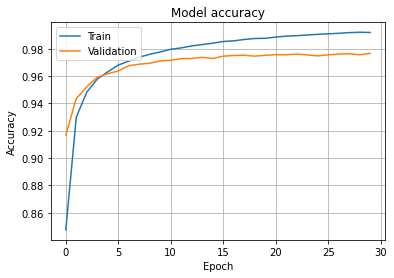

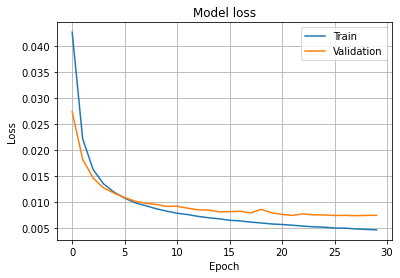

In [9]:
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

### fashion MNIST 인식

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

Epoch 1/30
469/469 - 1s - loss: 0.0849 - accuracy: 0.5278 - val_loss: 0.0330 - val_accuracy: 0.8215
Epoch 2/30
469/469 - 1s - loss: 0.0302 - accuracy: 0.8429 - val_loss: 0.0301 - val_accuracy: 0.8352
Epoch 3/30
469/469 - 1s - loss: 0.0273 - accuracy: 0.8583 - val_loss: 0.0278 - val_accuracy: 0.8477
Epoch 4/30
469/469 - 1s - loss: 0.0252 - accuracy: 0.8672 - val_loss: 0.0278 - val_accuracy: 0.8560
Epoch 5/30
469/469 - 1s - loss: 0.0238 - accuracy: 0.8738 - val_loss: 0.0246 - val_accuracy: 0.8612
Epoch 6/30
469/469 - 1s - loss: 0.0227 - accuracy: 0.8803 - val_loss: 0.0255 - val_accuracy: 0.8619
Epoch 7/30
469/469 - 1s - loss: 0.0219 - accuracy: 0.8849 - val_loss: 0.0236 - val_accuracy: 0.8679
Epoch 8/30
469/469 - 1s - loss: 0.0208 - accuracy: 0.8892 - val_loss: 0.0215 - val_accuracy: 0.8752
Epoch 9/30
469/469 - 1s - loss: 0.0201 - accuracy: 0.8932 - val_loss: 0.0219 - val_accuracy: 0.8730
Epoch 10/30
469/469 - 1s - loss: 0.0197 - accuracy: 0.8959 - val_loss: 0.0223 - val_accuracy: 0.8768

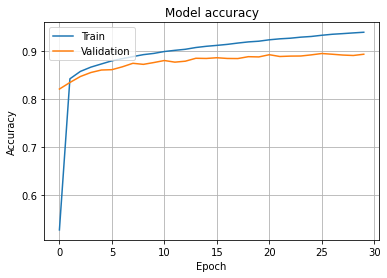

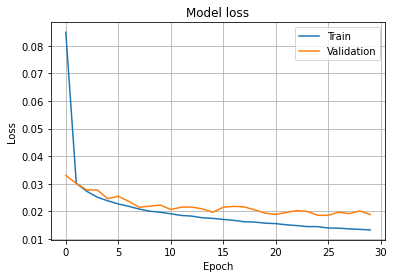

In [11]:
# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

## 깊은 다층 퍼셉트론

### 깊은 다층 퍼셉트론 프로그래밍

Epoch 1/30
469/469 - 1s - loss: 0.0263 - accuracy: 0.8953 - val_loss: 0.0131 - val_accuracy: 0.9472
Epoch 2/30
469/469 - 1s - loss: 0.0105 - accuracy: 0.9530 - val_loss: 0.0092 - val_accuracy: 0.9555
Epoch 3/30
469/469 - 1s - loss: 0.0071 - accuracy: 0.9662 - val_loss: 0.0081 - val_accuracy: 0.9571
Epoch 4/30
469/469 - 1s - loss: 0.0055 - accuracy: 0.9740 - val_loss: 0.0060 - val_accuracy: 0.9696
Epoch 5/30
469/469 - 1s - loss: 0.0044 - accuracy: 0.9795 - val_loss: 0.0051 - val_accuracy: 0.9755
Epoch 6/30
469/469 - 1s - loss: 0.0039 - accuracy: 0.9818 - val_loss: 0.0056 - val_accuracy: 0.9728
Epoch 7/30
469/469 - 1s - loss: 0.0035 - accuracy: 0.9838 - val_loss: 0.0051 - val_accuracy: 0.9724
Epoch 8/30
469/469 - 1s - loss: 0.0031 - accuracy: 0.9857 - val_loss: 0.0046 - val_accuracy: 0.9764
Epoch 9/30
469/469 - 1s - loss: 0.0028 - accuracy: 0.9876 - val_loss: 0.0046 - val_accuracy: 0.9762
Epoch 10/30
469/469 - 1s - loss: 0.0025 - accuracy: 0.9890 - val_loss: 0.0045 - val_accuracy: 0.9746

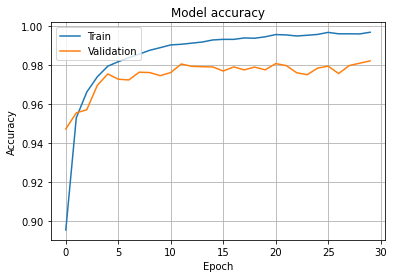

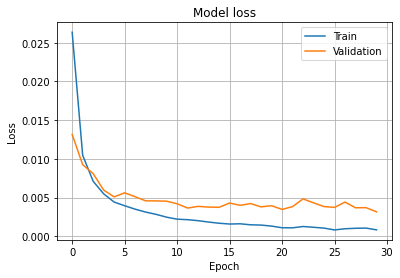

In [12]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 정확률 측정
res = mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

## 딥러닝이 사용하는 손실함수

### 손실 함수의 성능 비교: 평균제곱 오차와 교차 엔트로피

Epoch 1/30
469/469 - 1s - loss: 0.0150 - accuracy: 0.9002 - val_loss: 0.0094 - val_accuracy: 0.9394
Epoch 2/30
469/469 - 1s - loss: 0.0077 - accuracy: 0.9513 - val_loss: 0.0076 - val_accuracy: 0.9513
Epoch 3/30
469/469 - 1s - loss: 0.0060 - accuracy: 0.9622 - val_loss: 0.0059 - val_accuracy: 0.9627
Epoch 4/30
469/469 - 1s - loss: 0.0049 - accuracy: 0.9690 - val_loss: 0.0058 - val_accuracy: 0.9634
Epoch 5/30
469/469 - 1s - loss: 0.0043 - accuracy: 0.9724 - val_loss: 0.0058 - val_accuracy: 0.9629
Epoch 6/30
469/469 - 1s - loss: 0.0040 - accuracy: 0.9747 - val_loss: 0.0062 - val_accuracy: 0.9614
Epoch 7/30
469/469 - 1s - loss: 0.0035 - accuracy: 0.9780 - val_loss: 0.0048 - val_accuracy: 0.9694
Epoch 8/30
469/469 - 1s - loss: 0.0033 - accuracy: 0.9785 - val_loss: 0.0054 - val_accuracy: 0.9664
Epoch 9/30
469/469 - 1s - loss: 0.0032 - accuracy: 0.9797 - val_loss: 0.0043 - val_accuracy: 0.9728
Epoch 10/30
469/469 - 1s - loss: 0.0029 - accuracy: 0.9818 - val_loss: 0.0045 - val_accuracy: 0.9708

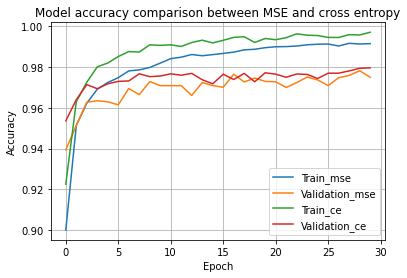

In [13]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 평균제곱오차를 사용한 모델
dmlp = Sequential()
dmlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp.add(Dense(units=n_hidden2, activation='tanh'))
dmlp.add(Dense(units=n_hidden3, activation='tanh'))
dmlp.add(Dense(units=n_hidden4, activation='tanh'))
dmlp.add(Dense(units=n_output, activation='softmax'))
# 신경망 학습
dmlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_mse = dmlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce = Sequential()
dmlp_ce.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4, activation='tanh'))
dmlp_ce.add(Dense(units=n_output, activation='softmax'))
# 신경망 학습
dmlp_ce.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

# 신경망 정확률 측정
res_mse = dmlp.evaluate(x_test, y_test, verbose=0)
print("평균제곱오차의 정확률은", res_mse[1]*100)
res_ce = dmlp_ce.evaluate(x_test, y_test, verbose=0)
print("교차 엔트로핑의 정확률은", res_ce[1]*100)

# 정확률 곡선
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_mse', 'Validation_mse', 'Train_ce', 'Validation_ce'], loc='best')
plt.grid()
plt.show()

## 딥러닝이 사용하는 옵티마이저

### 옵티마이저 성능 비교: SGD, Adam, Adagrad, RMSprop

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 1.3314 - accuracy: 0.6169 - val_loss: 0.8406 - val_accuracy: 0.7148
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.7569 - val_loss: 0.6767 - val_accuracy: 0.7634
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7927 - val_loss: 0.6009 - val_accuracy: 0.7894
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.8097 - val_loss: 0.5674 - val_accuracy: 0.8026
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.8215 - val_loss: 0.5308 - val_accuracy: 0.8164
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.8274 - val_loss: 0.5546 - val_accuracy: 0.7973
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8336 - val_loss: 0.8011 - val_accuracy: 0.7072
Epoch 

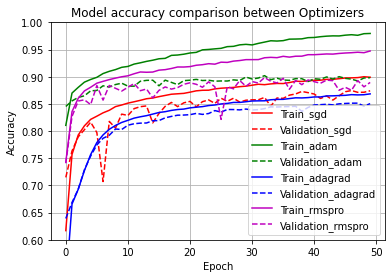

In [14]:
from tensorflow.keras.optimizers import Adagrad, RMSprop
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 하이퍼 매개변수 설정
batch_size = 256
n_epoch = 50

def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2, activation='relu'))
    model.add(Dense(units=n_hidden3, activation='relu'))
    model.add(Dense(units=n_hidden4, activation='relu'))
    model.add(Dense(units=n_output, activation='softmax'))
    
    return model
    
# SGD 옵티마이저를 사용하는 모델
dmlp_sgd = build_model()
dmlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
hist_sgd = dmlp_sgd.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test))

# Adam 옵티마이저를 사용하는 모델
dmlp_adam = build_model()
dmlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist_adam = dmlp_adam.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test))

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad = build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist_adagrad = dmlp_adagrad.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test))

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop = build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
hist_rmsprop = dmlp_rmsprop.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test))

# 4개의 모델의 정확률 출력
print("SGD 정확률은", dmlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)
print("Adam 정확률은", dmlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)
print("Adagrad 정확률은", dmlp_adagrad.evaluate(x_test, y_test, verbose=0)[1]*100)
print("RMSprop 정확률은", dmlp_rmsprop.evaluate(x_test, y_test, verbose=0)[1]*100)

# 시각화하여 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'], 'g')
plt.plot(hist_adam.history['val_accuracy'], 'g--')
plt.plot(hist_adagrad.history['accuracy'], 'b')
plt.plot(hist_adagrad.history['val_accuracy'], 'b--')
plt.plot(hist_rmsprop.history['accuracy'], 'm')
plt.plot(hist_rmsprop.history['val_accuracy'], 'm--')
plt.title('Model accuracy comparison between Optimizers')
plt.ylim(0.6, 1.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_sgd', 'Validation_sgd', 'Train_adam', 'Validation_adam', 'Train_adagrad', 'Validation_adagrad', 'Train_rmspro', 'Validation_rmspro'], loc='best')
plt.grid()
plt.show()

## 교차 검증을 이용한 하이퍼 매개변수 최적화

### 교차 검증을 이용한 옵티마이저 선택

SGD 정확률은 0.8526000022888184
Adam 정확률은 0.8945500135421753
Adagrad 정확률은 0.8343333244323731
RMSprop 정확률은 0.8871500134468079


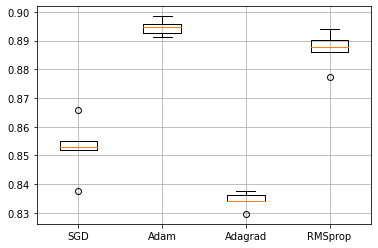

In [15]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train  = x_train.astype(np.float32)/255.0    # ndarray로 변환
x_test  = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 하이퍼 매개변수 설정
batch_size = 256
n_epoch = 20
k = 5

def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2, activation='relu'))
    model.add(Dense(units=n_hidden3, activation='relu'))
    model.add(Dense(units=n_hidden4, activation='relu'))
    model.add(Dense(units=n_output, activation='softmax'))
    
    return model

def cross_validation(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        
        dmlp=build_model()
        dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
        accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])

    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 진행
acc_sgd = cross_validation(SGD())
acc_adam = cross_validation(Adam())
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD 정확률은", np.array(acc_sgd).mean())
print("Adam 정확률은", np.array(acc_adam).mean())
print("Adagrad 정확률은", np.array(acc_adagrad).mean())
print("RMSprop 정확률은", np.array(acc_rmsprop).mean())

import matplotlib.pyplot as plt
plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels=['SGD', 'Adam', 'Adagrad', 'RMSprop'])
plt.grid()